# ASL

##### source dataset: https://www.kaggle.com/datasets/datamunge/sign-language-mnist

In [35]:
import pandas as pd

In [36]:
train_df = pd.read_csv("sign_mnist_train.csv")
test_df = pd.read_csv("sign_mnist_test.csv")

## Exploring the Data

In [37]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [38]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


## Extracting the Labels

In [39]:
y_train = train_df['label']
y_test = test_df['label']
del train_df['label']
del test_df['label']

## Extracting the Images

In [40]:
x_train = train_df.values
x_test = test_df.values

## Summarizing the Training and Validation Data

In [41]:
x_train.shape

(27455, 784)

In [42]:
y_train.shape

(27455,)

In [43]:
x_test.shape

(7172, 784)

In [44]:
y_test.shape

(7172,)

## Visualizing the Data

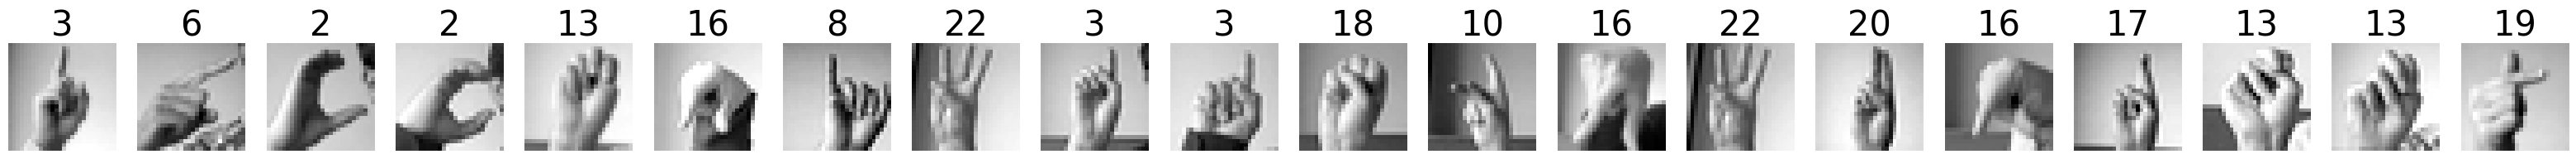

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))

num_images = 20
for i in range(num_images):
    row = x_train[i]
    label = y_train[i]
    
    image = row.reshape(28,28)
    plt.subplot(1, num_images, i+1)
    plt.title(label, fontdict={'fontsize': 30})
    plt.axis('off')
    plt.imshow(image, cmap='gray')

## Normalize the Image Data

In [46]:
x_train.min()

np.int64(0)

In [47]:
x_train.max()

np.int64(255)

In [48]:
x_train = x_train / 255
x_test = x_test / 255

## Solution

In [49]:
x_train = x_train / 255
x_test = x_test / 255

## Categorize the Labels

In [54]:
import tensorflow.keras as keras
import numpy as np
num_classes = 24

In [56]:
num_classes = np.max(y_train) + 1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [58]:
model = Sequential()
model.add(Dense(units = 512, activation='relu', input_shape=(784,)))
model.add(Dense(units = 512, activation='relu'))
model.add(Dense(units = num_classes, activation='softmax'))

# Sumarizing the model

In [59]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 25)                  │          12,825 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 677,401 (2.58 MB)

 Trainable params: 677,401 (2.58 MB)

 Non-trainable params: 0 (0.00 B)

# Comling the model

In [60]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model

In [61]:
model.fit(x_train, y_train, epochs=20, verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0444 - loss: 3.1899 - val_accuracy: 0.0358 - val_loss: 3.1916
Epoch 2/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0928 - loss: 3.0550 - val_accuracy: 0.1757 - val_loss: 2.6191
Epoch 3/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2189 - loss: 2.4045 - val_accuracy: 0.2570 - val_loss: 2.2153
Epoch 4/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3078 - loss: 2.0123 - val_accuracy: 0.3256 - val_loss: 1.9790
Epoch 5/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3526 - loss: 1.8704 - val_accuracy: 0.3622 - val_loss: 1.9266
Epoch 6/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4087 - loss: 1.7264 - val_accuracy: 0.4335 - val_loss: 1.7430
Epoch 7/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4738 - loss: 1.5688 - val_accuracy: 0.4647 - val_loss: 1.6018
Epoch 8/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5338 - loss: 1.3736 - val_accuracy: 0.